In [2]:
from pathlib import Path
import itertools

import numpy as np
# https://matplotlib.org/gallery/lines_bars_and_markers/curve_error_band.html#sphx-glr-gallery-lines-bars-and-markers-curve-error-band-py
from scipy.interpolate import splprep, splev


import matplotlib.ticker as mticker
import matplotlib.patches as mpatches
import matplotlib.collections as mcollections
import matplotlib.colors as mcolors
import matplotlib.path as mpath
import matplotlib.pyplot as plt


import themepy
spath = Path("../../../draft/figures/math/")

theme = themepy.Theme('paper')

%matplotlib inline

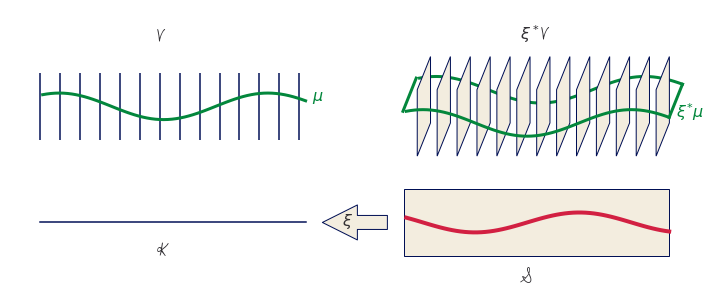

In [273]:
fig, axd  = plt.subplot_mosaic([['k', 's']], figsize=(10,4), 
                                    constrained_layout=True)

facecolor = axd['k'].get_facecolor()


xpos = [.1, .9]
x = np.linspace(-2*np.pi, np.pi*2, 1000)
inds = ((x>xposl[0]) & (x<xposl[-1]))
xin = x[inds]
mu = np.sin(xin*10)*.04 +.5
y = np.cos(xin*10)*.03+.2


axd['k'].vlines(np.arange(xpos[0], xpos[-1],.06), ymin=.45, ymax=.65)
axd['k'].axhline(0.2, xmin=xpos[0], xmax=xpos[-1])
axd['k'].annotate('K', (.45, 0.1), fontsize=16)
axd['k'].plot(xin, mu+.05, 'C2', linewidth=3, zorder=10)
axd['k'].annotate(r'$\mu$', (xpos[-1]+.02, mu[-1]+.05), fontsize=16, color='C2')
axd['k'].annotate("V", (.45,.75), fontsize=16)
axd['k'].set(aspect='equal', ylim=(0,.85), xlim=[0,1])
b1 = mpatches.Rectangle((xpos[0], 0.1), height=.2, width=(xposl[-1]-xposl[0]), 
                        facecolor=facecolor, edgecolor='C0')
axd['s'].add_patch(b1)
axd['s'].plot(x[inds], y, color='C1', linewidth=4)

for off in np.arange(.04,.78,.06):
    verts = np.array([[.1, .4], [.1,.6], [.14, .7], [.14, .5], [.1, .6 ]]) + [off, 0]
    p = mpatches.PathPatch(mpath.Path(verts, closed=True), edgecolor='C0',
                                      facecolor=facecolor)
    axd['s'].add_patch(p)
    
axd['s'].plot(xin, mu, 'C2', linewidth=3)
axd['s'].plot(xin+.04, mu+.1, 'C2', zorder=-2, linewidth=3)
axd['s'].plot([xin[0]-.01, xin[0]+.03], [mu[0], mu[0]+.1], color='C2', linewidth=3)
axd['s'].plot([xin[-1], xin[-1]+.04], [mu[-1], mu[-1]+.1], color='C2', linewidth=3)
axd['s'].annotate(r'$\xi^{*}\mu$', (xpos[-1]+.02, mu[-1]), fontsize=16, color='C2')
axd['s'].annotate(r"$\xi^*$V", (.45,.75), fontsize=16)
axd['s'].annotate('S', (.45,0.02),  fontsize=16)
axd['s'].set(aspect='equal', ylim=(0,.85), xlim=(0,1))
fig.text(.482,.23, r'$\xi$', fontsize=16)
con_ft = mpatches.ConnectionPatch(xyA=(.05,.2), coordsA=axd['s'].transData,
                        xyB=(.95, .2), coordsB=axd['k'].transData,   
                         arrowstyle="simple", mutation_scale=70, 
                        facecolor=facecolor, edgecolor='C0')
fig.add_artist(con_ft)
axd['k'].axis('off')
axd['s'].axis('off')
fig.savefig(spath/"q_hat.png", bbox_inches='tight', facecolor='white')

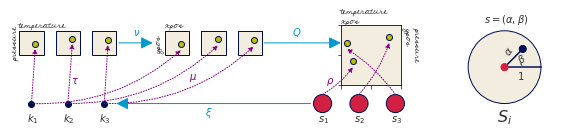

In [604]:
fig, axd = plt.subplot_mosaic([['E', 'V', 'H', 'glyph']], figsize=(10,5))
for k in axd:
    axd[k].set(xlim=(0,1), ylim=(0,1), aspect='equal')
    axd[k].axis('off')
    
ac = '#0099CC'
oc = 'C4'

yl = .2
xpos = [.2, .5,.8]
s = axd['E'].scatter(xpos, [yl,yl,yl], zorder=100)
yt = [44, 48, 47]
xt = [32,38, 31]
klabs = [r'$k_{1}$', r'$k_{2}$',r'$k_{3}$' ]
slabs = [r'$s_{1}$', r'$s_{2}$',r'$s_{3}$' ]

axsub = axd['H'].inset_axes([.35, .35, .5, .5] )
axsub.set(xticklabels=[], yticklabels=[], ylim=(40,50), xlim=(30,40))
axsub.scatter(xt,yt, color='C5', edgecolor='C0')

for i, (off, kl, sl) in enumerate(zip(xpos, klabs, slabs)):
    verts = np.array([[0, .4], [0,.6], [.2, .6], [.2, .4], [0, .6 ]]) + [off-.1, .2]
    pe = mpatches.PathPatch(mpath.Path(verts, closed=True), edgecolor='C0',
                                      facecolor=facecolor)
    axd['E'].add_patch(pe)
    
    pv = mpatches.PathPatch(mpath.Path(verts, closed=True), edgecolor='C0',
                                      facecolor=facecolor)
    axd['V'].add_patch(pv)
    xp = (xt[i]/1000)+off
    yp = (yt[i]/100)+.25
    axd['E'].scatter(xp,yp, zorder=100, color='C5', edgecolor='C0')
    axd['V'].scatter(xp,yp, zorder=100, color='C5', edgecolor='C0')
    
    axd['E'].annotate(kl,(off-.04, yl-.15))
    axd['H'].annotate(sl,(off-.04, yl-.15))
        
    c = mpatches.Circle((off,yl), radius=.075, edgecolor='C0', facecolor='C1')
    axd['H'].add_patch(c)
   
    
    a1 = mpatches.FancyArrowPatch((off,.2), (xp,yp-.02), arrowstyle="-|>",  
                                  linestyle=':', mutation_scale=10, color=oc)
    axd['E'].add_patch(a1)
    
    a2 = mpatches.ConnectionPatch(xyA=(off,.2), coordsA=axd['E'].transData,
                      xyB=(xp,yp-.05), coordsB=axd['V'].transData,  arrowstyle="-|>",
                                  mutation_scale=10, connectionstyle="arc3,rad=.2",
                                 linestyle=':', color=oc)
    fig.add_artist(a2)
    
    a3 = mpatches.ConnectionPatch(xyA=(off,.2+.075), coordsA=axd['H'].transData,
                      xyB=(xt[i],yt[i]-1), coordsB=axsub.transData,  arrowstyle="-|>",
                                  mutation_scale=10, connectionstyle="arc3,rad=0.1",
                                 linestyle=':', color=oc)
    fig.add_artist(a3)
    
    
    
a3 = mpatches.ConnectionPatch(xyA=(0.1,yl), coordsA=axd['H'].transData,
                      xyB=(xpos[-1]+.1, yl), coordsB=axd['E'].transData,  arrowstyle="-|>",
                                  mutation_scale=25, zorder=10, color=ac)
fig.add_artist(a3)

a4 = mpatches.ConnectionPatch(xyA=(0.92,.7), coordsA=axd['E'].transData,
                      xyB=(0, .7), coordsB=axd['V'].transData,  arrowstyle="-|>",
                                  mutation_scale=25, zorder=10, color=ac)
fig.add_artist(a4)
a5 = mpatches.ConnectionPatch(xyA=(0.92,.7), coordsA=axd['V'].transData,
                      xyB=(.35, .7), coordsB=axd['H'].transData,  arrowstyle="-|>",
                                  mutation_scale=25, zorder=10, color=ac)
fig.add_artist(a5)

fig.text(.4, .37, r'$\xi$', color=ac)
fig.text(.3, .59, r'$\nu$', color=ac)
fig.text(.52, .59, r'$Q$', color=ac)

axd['E'].annotate('temperature', (.1, .83))
axd['E'].annotate('pressure', (0.03, .58), rotation=90)

axd['V'].annotate('xpos',  (.1, .83))
axd['V'].annotate('ypos',  (0.03, .65), rotation=90)

axd['H'].annotate('temperature\nxpos', (.35, .865))
axd['H'].annotate('pressure\nypos', (.85, .58), rotation=-90)

axd['E'].annotate(r'$\tau$',(0.53, 0.37), color=oc)
axd['V'].annotate(r'$\mu$', (.3, .4), color=oc)
axd['H'].annotate(r'$\rho$', (.23, .37), color=oc)

sc = mpatches.Circle((.5,.5), radius=.3, edgecolor='C0', facecolor=facecolor)
axd['glyph'].add_patch(sc)
axd['glyph'].annotate(r"$S_i$", (.44,0.05), fontsize=16)
axd['glyph'].annotate(r'$s=(\alpha, \beta)$', (.33, .87))
axd['glyph'].plot([.5, .8], [.5, .5], color='C0')
axd['glyph'].plot([.5,.65], [.5, .65], color='C0')
axd['glyph'].scatter([.5, .65], [.5, .65], c=['C1','C0'], s=50, zorder=100)
axd['glyph'].annotate(r'$\alpha$', (.49, .60), rotation=55)
axd['glyph'].annotate(r'$\beta$', (.59, .53), rotation=30)
axd['glyph'].annotate(r'$1$', (.6, .4))
axd['glyph'].axis('off')
fig.savefig(spath/"scatter.png", bbox_inches='tight', facecolor='white' )